In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [7]:
df = pd.read_excel('online_retail_II.xlsx')

In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [11]:
df.dropna(subset=['Customer ID'], inplace=True)
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
snapshot_date = df['InvoiceDate'].max()

customer_data = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  
    'Invoice': 'nunique',                                     
    'TotalPrice': 'sum',                                      
    'Country': 'first'
}).reset_index()

customer_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Country']


In [13]:
customer_data = pd.get_dummies(customer_data, columns=['Country'], drop_first=True)

In [14]:
X = customer_data.drop(['CustomerID', 'Monetary'], axis=1)
y = customer_data['Monetary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [17]:
r2_scores = {}
rmse_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, preds)
    rmse_scores[name] = mean_squared_error(y_test, preds, squared=False)
    print(f"\n{name}")
    print("R² Score:", r2_scores[name])
    print("RMSE:", rmse_scores[name])


d:\anaconda\envs\newenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Linear Regression
R² Score: 0.33962991515590146
RMSE: 7842.483177359675


d:\anaconda\envs\newenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Random Forest
R² Score: 0.5268837517391962
RMSE: 6638.100630362489


d:\anaconda\envs\newenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



Gradient Boosting
R² Score: 0.399036825956832
RMSE: 7481.416448809038

XGBoost
R² Score: 0.3733267166631813
RMSE: 7639.773625640827


d:\anaconda\envs\newenv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


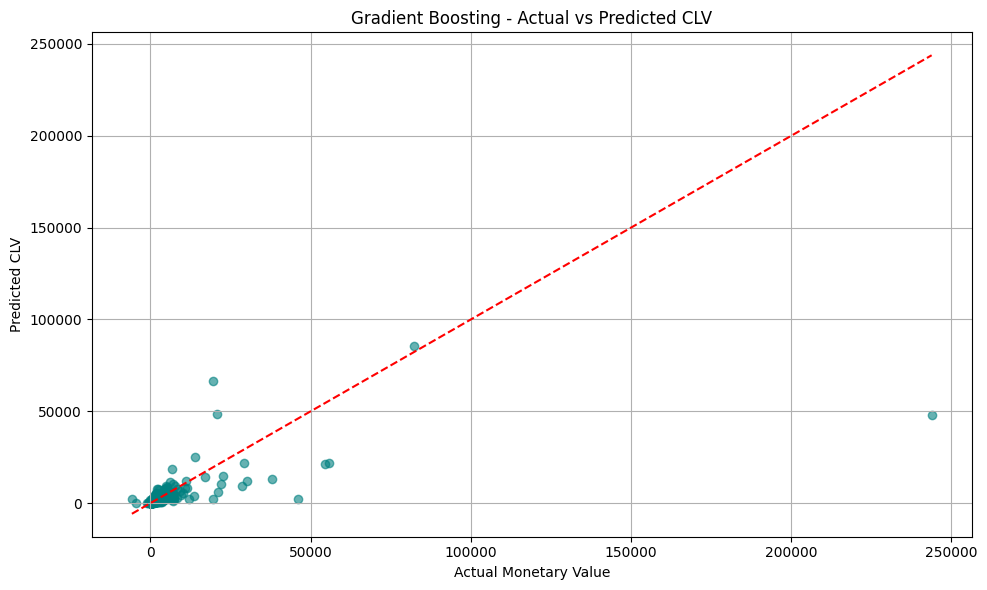

In [18]:
plt.figure(figsize=(10, 6))
gb_preds = models['Gradient Boosting'].predict(X_test)
plt.scatter(y_test, gb_preds, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted CLV')
plt.title('Gradient Boosting - Actual vs Predicted CLV')
plt.grid(True)
plt.tight_layout()
plt.show()

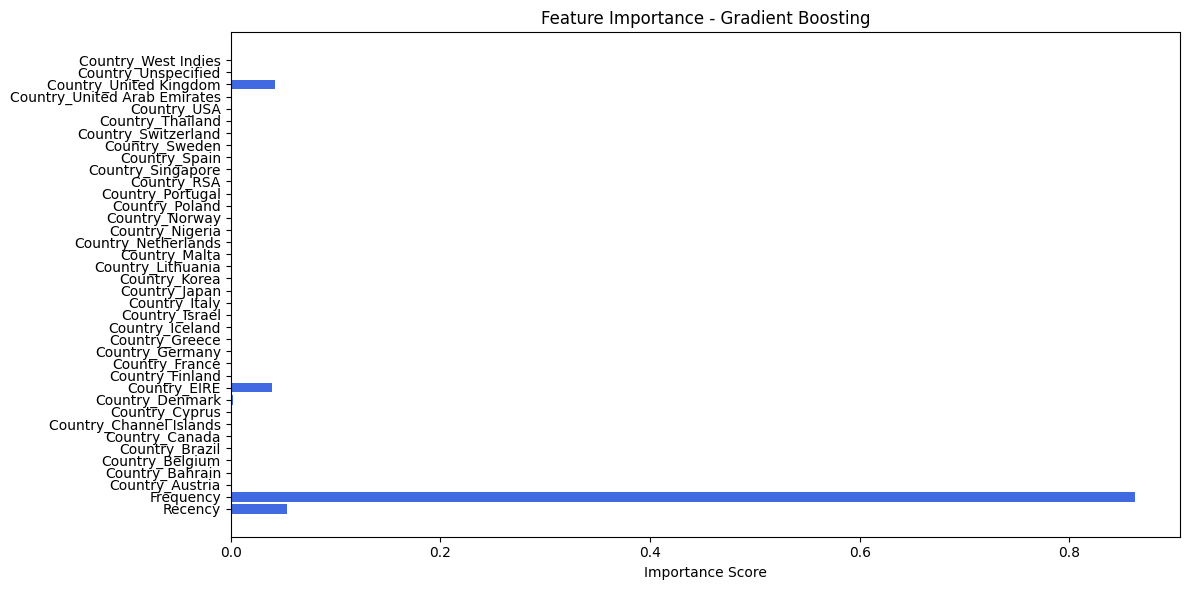

In [19]:
importances = models['Gradient Boosting'].feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='royalblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()




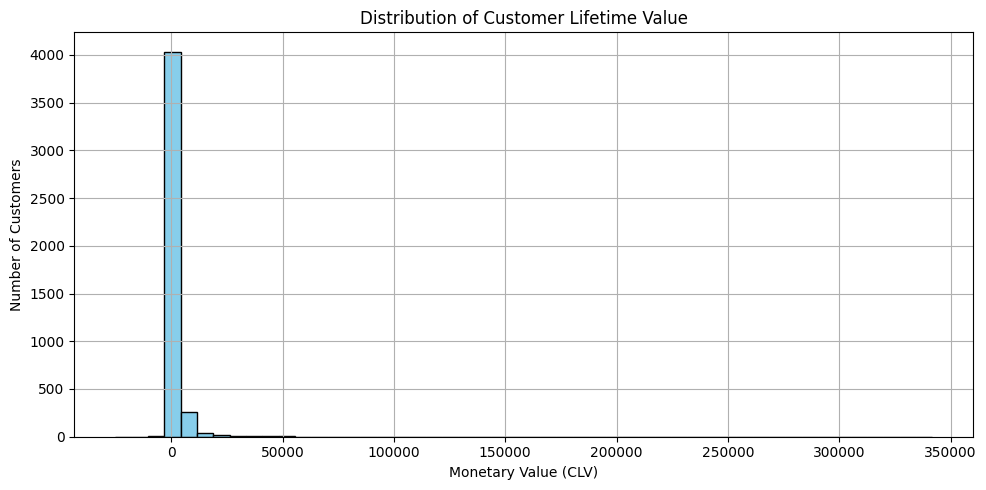

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(customer_data['Monetary'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Monetary Value (CLV)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Lifetime Value')
plt.grid(True)
plt.tight_layout()
plt.show()


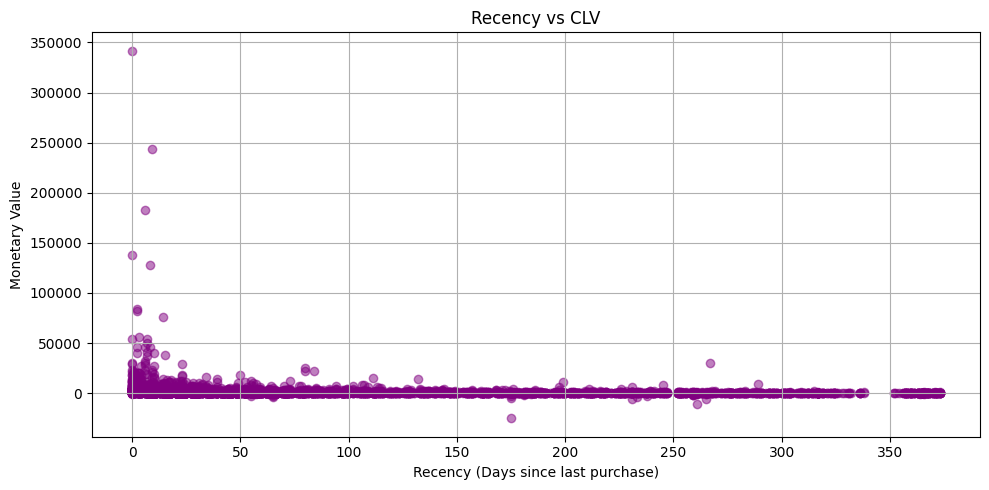

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(customer_data['Recency'], customer_data['Monetary'], alpha=0.5, color='purple')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary Value')
plt.title('Recency vs CLV')
plt.grid(True)
plt.tight_layout()
plt.show()

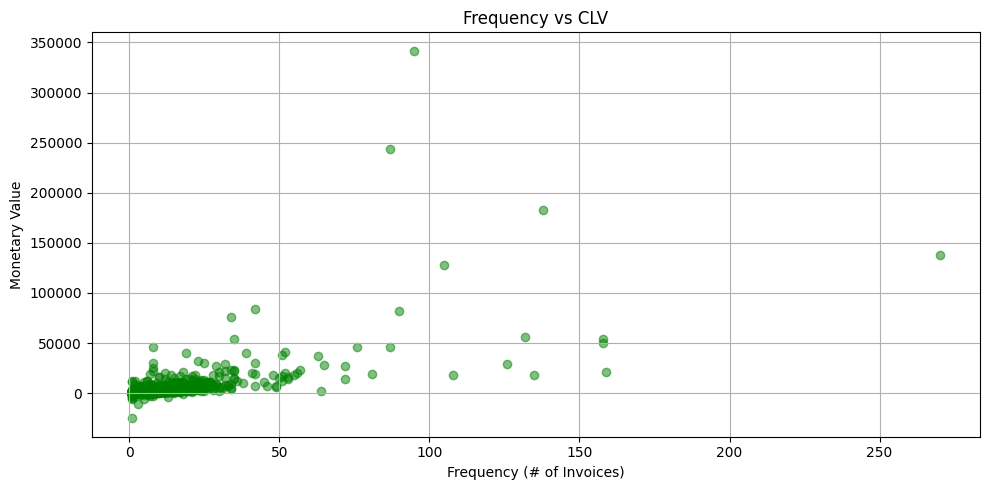

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(customer_data['Frequency'], customer_data['Monetary'], alpha=0.5, color='green')
plt.xlabel('Frequency (# of Invoices)')
plt.ylabel('Monetary Value')
plt.title('Frequency vs CLV')
plt.grid(True)
plt.tight_layout()
plt.show()

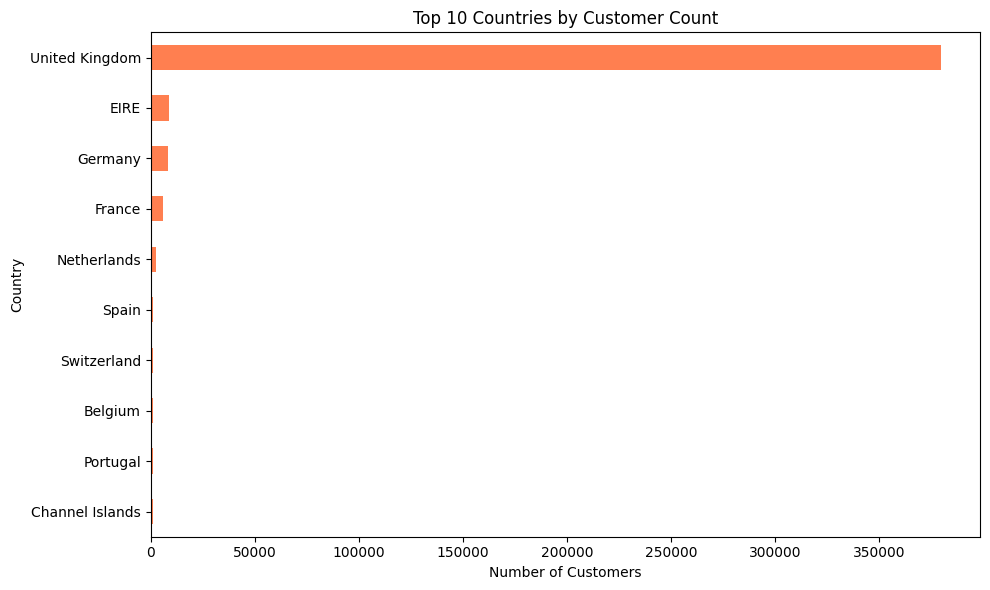

In [23]:
top_countries = df['Country'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', color='coral')
plt.xlabel('Number of Customers')
plt.title('Top 10 Countries by Customer Count')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

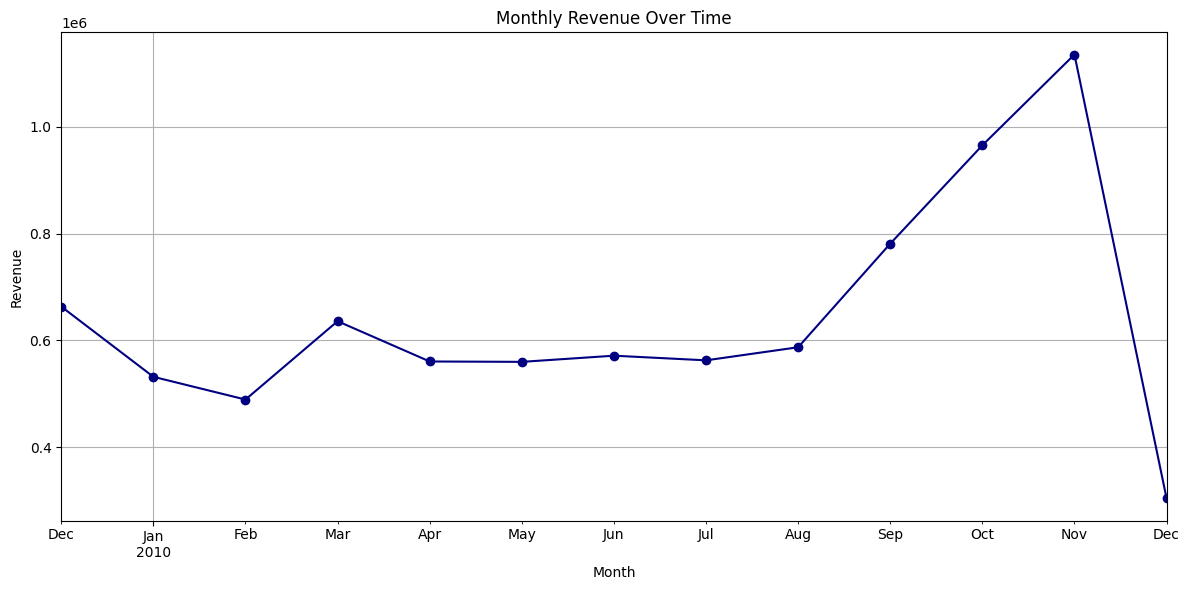

In [24]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color='navy')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

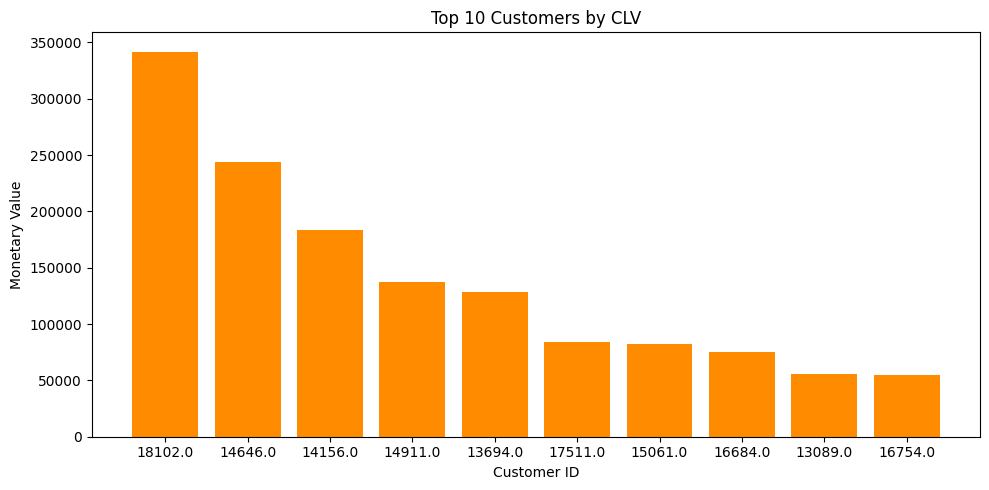

In [25]:
top_customers = customer_data[['CustomerID', 'Monetary']].sort_values(by='Monetary', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Monetary'], color='darkorange')
plt.xlabel('Customer ID')
plt.ylabel('Monetary Value')
plt.title('Top 10 Customers by CLV')
plt.tight_layout()
plt.show()

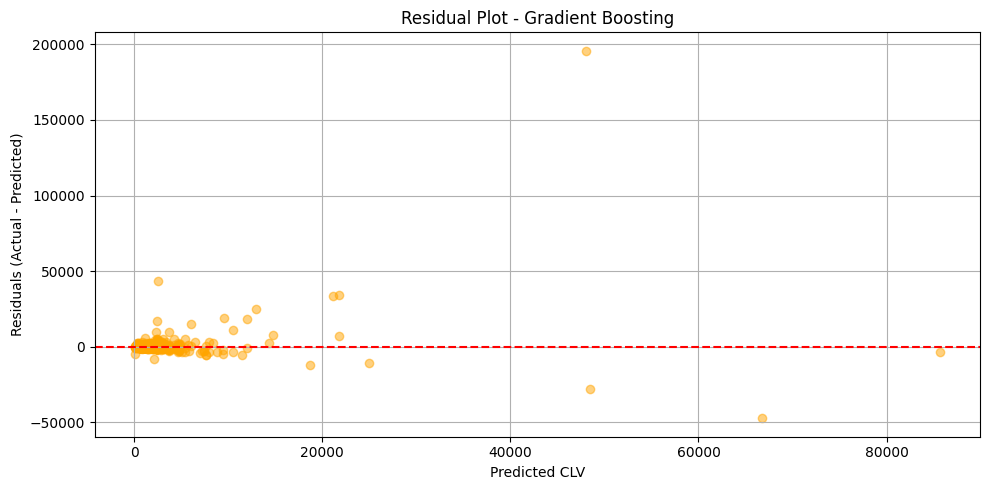

In [26]:
residuals = y_test - gb_preds

plt.figure(figsize=(10, 5))
plt.scatter(gb_preds, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CLV')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot - Gradient Boosting')
plt.grid(True)
plt.tight_layout()
plt.show()


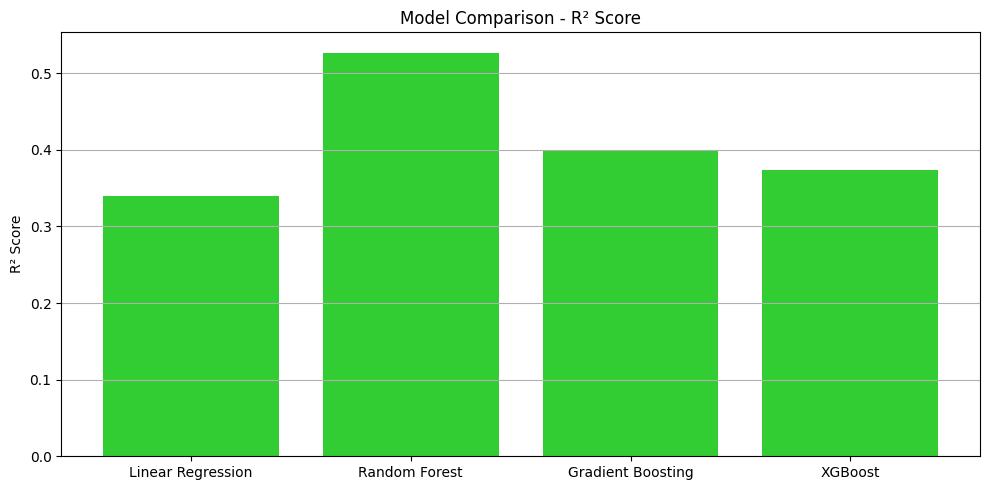

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color='limegreen')
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

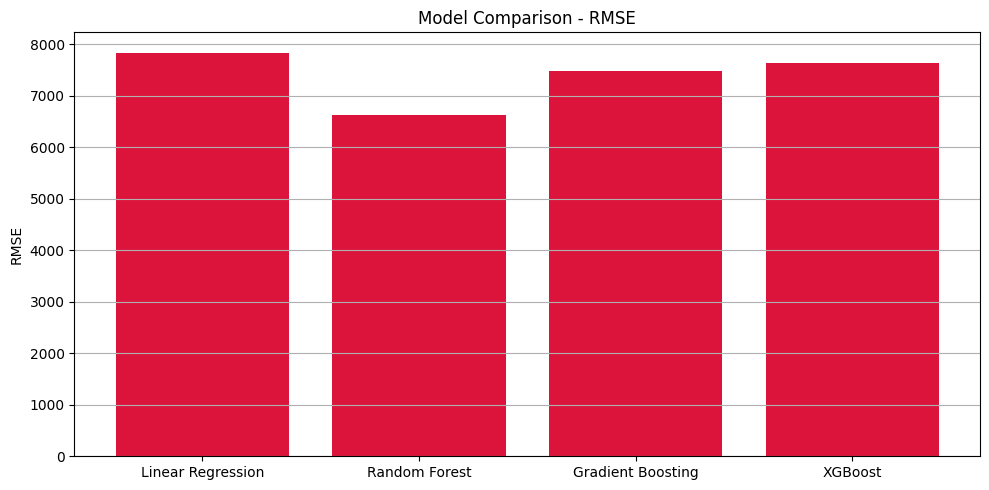

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(rmse_scores.keys(), rmse_scores.values(), color='crimson')
plt.ylabel("RMSE")
plt.title("Model Comparison - RMSE")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
